# Visualize Pulsation Ratio
The pulsation ratio has interesting shapes across detectors. Can we use this to constrain our model?

In [6]:
# Load & Scale the data
from pathlib import Path
import json
import pandas as pd

file_name = 'pulsation_ratio'
# Load data
DATA_PATH = Path().resolve().parent.parent / "data" / "processed_data" / f"{file_name}.pkl"
data = pd.read_pickle(DATA_PATH)

# Load Configs
CONFIG_PATH = Path().resolve().parent.parent / "data" / "processed_data" / f"{file_name}.json"
with open(CONFIG_PATH, "r") as f:
    config = json.load(f)
labels = config["labels"]
features = config["features"]

# Cleanup
data.dropna(inplace=True)
# Filter data so I don't have to wait for too long during training
data = data[
    (data["Maternal Wall Thickness"] >= 2.0)
    & (data["Maternal Wall Thickness"] <= 12.0)
    # & (np.round(data["Fetal Hb Concentration"], fconc_rounding).isin(groups_to_keep))
    & (data["Fetal Saturation"] > 0.3)
    & (data["Maternal Saturation"] > 0.95)
]

y_columns = labels  # What to Predict
if "FconcCenters" in y_columns:
    y_columns.remove("FconcCenters")
print("Y Columns", y_columns)

x_columns = features  # What to use as input
print("X Columns", x_columns)

Y Columns ['Maternal Wall Thickness', 'Maternal Hb Concentration', 'Maternal Saturation', 'Fetal Saturation', 'Fetal Hb Concentration 1', 'Fetal Hb Concentration 2']
X Columns ['MAX_ACbyDC_WV1_10', 'MAX_ACbyDC_WV1_15', 'MAX_ACbyDC_WV1_19', 'MAX_ACbyDC_WV1_24', 'MAX_ACbyDC_WV1_28', 'MAX_ACbyDC_WV1_33', 'MAX_ACbyDC_WV1_37', 'MAX_ACbyDC_WV1_41', 'MAX_ACbyDC_WV1_46', 'MAX_ACbyDC_WV1_50', 'MAX_ACbyDC_WV1_55', 'MAX_ACbyDC_WV1_59', 'MAX_ACbyDC_WV1_64', 'MAX_ACbyDC_WV1_68', 'MAX_ACbyDC_WV1_72', 'MAX_ACbyDC_WV1_77', 'MAX_ACbyDC_WV1_81', 'MAX_ACbyDC_WV1_86', 'MAX_ACbyDC_WV1_90', 'MAX_ACbyDC_WV1_94', 'MAX_ACbyDC_WV2_10', 'MAX_ACbyDC_WV2_15', 'MAX_ACbyDC_WV2_19', 'MAX_ACbyDC_WV2_24', 'MAX_ACbyDC_WV2_28', 'MAX_ACbyDC_WV2_33', 'MAX_ACbyDC_WV2_37', 'MAX_ACbyDC_WV2_41', 'MAX_ACbyDC_WV2_46', 'MAX_ACbyDC_WV2_50', 'MAX_ACbyDC_WV2_55', 'MAX_ACbyDC_WV2_59', 'MAX_ACbyDC_WV2_64', 'MAX_ACbyDC_WV2_68', 'MAX_ACbyDC_WV2_72', 'MAX_ACbyDC_WV2_77', 'MAX_ACbyDC_WV2_81', 'MAX_ACbyDC_WV2_86', 'MAX_ACbyDC_WV2_90', 'MAX

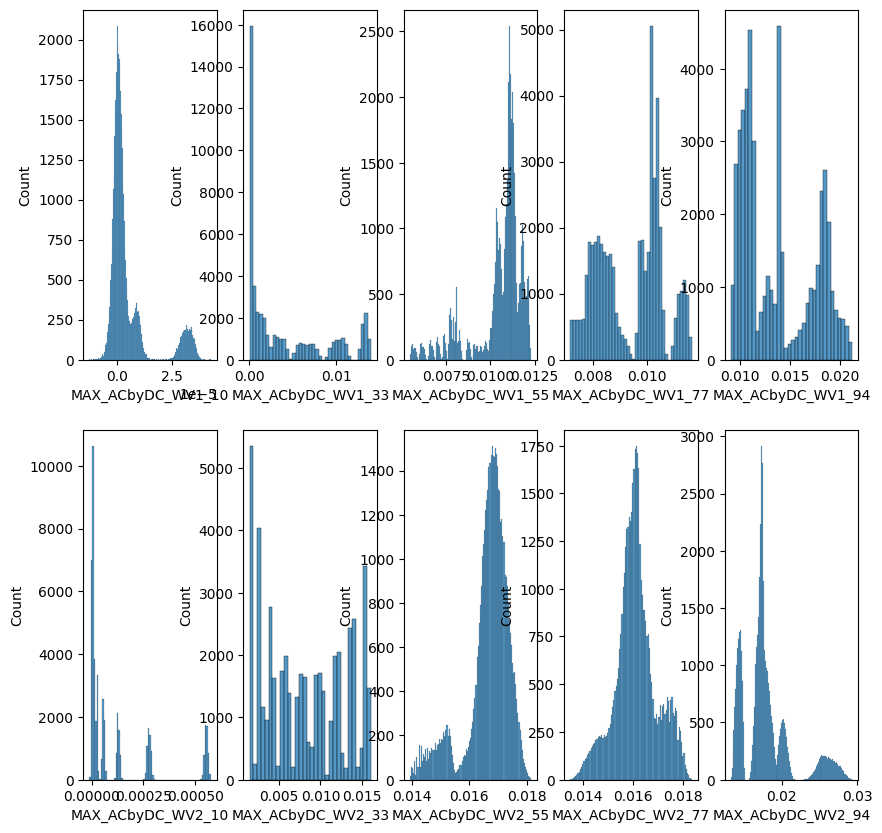

In [16]:
# Plot the mean of x_columns
import matplotlib.pyplot as plt
import seaborn as sns

# Choose 5 columns from each wavelength
chosen_sdd = [10, 33, 55, 77, 94]
chosen_sdd = [str(x) for x in chosen_sdd]
filtered_x_columns = list(filter(lambda x: x.split("_")[-1] in chosen_sdd, x_columns))

# Plot the distribution of the chosen columns
fig, axes = plt.subplots(2, len(filtered_x_columns) // 2, figsize=(10, 10))
axes = axes.flatten()

for i, column in enumerate(filtered_x_columns):
    sns.histplot(data[column], ax=axes[i])
    # axes[i].set_title(column)
plt.show()


Comments: These distributions look all over the place >.<